## Preprocessing of the Harvard Data Set

In [39]:
#importation of libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [40]:

# Definir rutas
base_path = r'c:\Users\jakif\CODE\PROYECTO-FINAL\images\harvard_dataset\ISIC2018_Task3_Test_Images'
metadata_test_path = os.path.join(base_path, 'ISIC2018_Task3_Test_GroundTruth.csv')
images_test_path = os.path.join(base_path, 'ISIC2018_Task3_Test_Images')



In [41]:
#imprimir las 5 primeras fials
metadata = pd.read_csv(metadata_test_path)
print(metadata.head())

         lesion_id      image_id   dx    dx_type   age     sex localization  \
0  HAMTEST_0000000  ISIC_0034524   nv  follow_up  40.0  female         back   
1  HAMTEST_0000001  ISIC_0034525   nv      histo  70.0    male      abdomen   
2  HAMTEST_0000002  ISIC_0034526  bkl      histo  70.0    male         back   
3  HAMTEST_0000003  ISIC_0034527   nv      histo  35.0    male        trunk   
4  HAMTEST_0000004  ISIC_0034528   nv  follow_up  75.0  female        trunk   

         dataset  
0  vidir_molemax  
1      rosendahl  
2      rosendahl  
3    vienna_dias  
4  vidir_molemax  


In [42]:
#mostrar 5 primeras imagenes
images_test = os.listdir(images_test_path)
print(images_test[-5:])


['ISIC_0036060.jpg', 'ISIC_0036061.jpg', 'ISIC_0036062.jpg', 'ISIC_0036063.jpg', 'ISIC_0036064.jpg']


In [43]:
print("numero de imagenes en la carpeta 1: ", len(images_test))


numero de imagenes en la carpeta 1:  1512


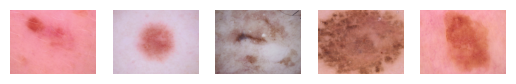

In [44]:
# Filter out non-image files
valid_images = [img for img in images_test if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

train_images = []
for i in range(5):
    img_path = os.path.join(images_test_path, valid_images[i])
    img = Image.open(img_path)  # Open the actual image file
    train_images.append(np.array(img))

# Mostrar las primeras 5 imágenes
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i])  # Display the loaded image arrays
    plt.axis('off')
plt.show()

For facilitate the preprocess of data we have merged the files into one

clear dataset:

akiec: Actinic keratoses (premaligno)

bcc: Basal cell carcinoma (maligno, pero no melanoma)

bkl: Benign keratosis (benigno)

df: Dermatofibroma (benigno)

mel: Melanoma maligno (clase objetivo)

nv: Melanocytic nevi (benigno) (clase objetivo)

vasc: Vascular lesions (benigno)

In [45]:
#count the number of images in the merged folder
diagnosis_counts = metadata['dx'].value_counts()

In [46]:
print(diagnosis_counts)

dx
nv       909
bkl      217
mel      171
bcc       93
df        44
akiec     43
vasc      35
Name: count, dtype: int64


we can see that is very unbalanced between nv and mel. We can try to do augmentation of data 


In [47]:
#detectar dx (mel) guardar image_id

mel_images = metadata[metadata['dx'] == 'mel']['image_id'].tolist()
print("Total images with diagnosis 'mel':", len(mel_images))
# Display the first 5 image IDs with diagnosis 'mel'
print("First 5 image IDs with diagnosis 'mel':", mel_images[:5])

Total images with diagnosis 'mel': 171
First 5 image IDs with diagnosis 'mel': ['ISIC_0034529', 'ISIC_0034548', 'ISIC_0034572', 'ISIC_0034573', 'ISIC_0034584']


In [48]:
#dividir en carpetas benignas(nv) y malignas(mel)
benign_images = metadata[metadata['dx'] == 'nv']['image_id'].tolist()
malignant_images = metadata[metadata['dx'] == 'mel']['image_id'].tolist()
#añadir .jpg a los nombres de las imagenes
benign_images = [img + '.jpg' for img in benign_images]
malignant_images = [img + '.jpg' for img in malignant_images]

#seleccionar imagenes benignas y malignas de la carpeta merged_images_part1_part2
benign_images_path = os.path.join(base_path, 'benign_images')
malignant_images_path = os.path.join(base_path, 'malignant_images')

# Crear directorios si no existen
os.makedirs(benign_images_path, exist_ok=True)
os.makedirs(malignant_images_path, exist_ok=True)

# Copiar imágenes benignas
for img in benign_images:
    src = os.path.join(images_test_path, img)
    dst = os.path.join(benign_images_path, img)
    if os.path.isfile(src):
        os.rename(src, dst)  # Move the file to the new location
# Copiar imágenes malignas
for img in malignant_images:
    src = os.path.join(images_test_path, img)
    dst = os.path.join(malignant_images_path, img)
    if os.path.isfile(src):
        os.rename(src, dst)  # Move the file to the new location

In [49]:
#contar el numero de imagenes benignas y malignas
benign_count = len(os.listdir(benign_images_path))
malignant_count = len(os.listdir(malignant_images_path))
print("Total benign images:", benign_count)
print("Total malignant images:", malignant_count)

Total benign images: 908
Total malignant images: 171


In [50]:
#eliminar filas que no sean dx = nv o mel 
metadata_clear = metadata[metadata['dx'].isin(['nv', 'mel'])]
#crear un csv nuevo con las imagenes benignas y malignas
metadata_clear.to_csv(os.path.join(base_path, 'metadata_clear.csv'), index=False)